# The "Catering Capacity": A Model by Meg and Sparsh


Project 1

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [2]:
from pandas import read_html

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [3]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

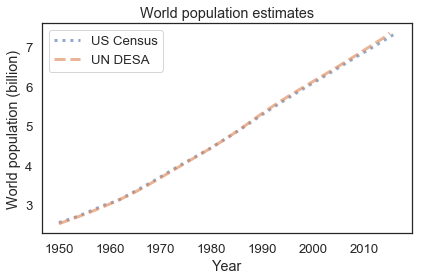

In [4]:
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
plot_results(census, un, empty, 'World population estimates')

# How does world food production affect earth's ability to actually reach the carrying capacity of 13.8888889 billion by 2050? 

Since 1970, the food population has been growing fairly quadratically, as shown in the figure. Will there be enough food to cater to the population at the equilibrium point?

Will we be able to decrease the amount of food wasted to meet the future food demands?

To explore this question, we will model the carrying capacity and the food production rate, which we call the catering capacity.

We'll use our projection of the world population from 1950 to 2050, and compare it to the model's projected catering capacity of from 1950 till 2050.

# Method 1: 
(i) Yield of Vegetables per hectare 
(ii) Total area used for crop production
(iii) Average quantity of food consumed by humans

In [5]:
from pandas import read_csv
food_data = read_csv("FAOSTAT_data_9-24-2018.csv")
food_data.columns = ['Year', 'Unit', 'Value', 'Food production in billions of hg', 'Food production in billions of pounds',  'Catering_Capacity_in_billions_of_people']
#print(food_data)

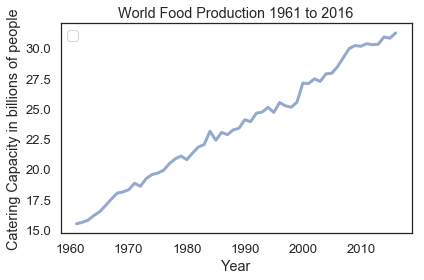

In [6]:
plot(food_data.Year, food_data.Catering_Capacity_in_billions_of_people)
decorate(title = "World Food Production 1961 to 2016",
        xlabel = "Year",
        ylabel = "Catering Capacity in billions of people")

# Linear Growth Model

In [7]:
Catering_Capacity_in_billions_of_people = food_data.Catering_Capacity_in_billions_of_people
Year = food_data.Year
food_data.head()

,Year,Unit,Value,Food production in billions of hg,Food production in billions of pounds,Catering_Capacity_in_billions_of_people
0,1961,hg/ha,93453,140179.5,30904.28968,15.483111
1,1962,hg/ha,94179,141268.5,31144.37309,15.603393
2,1963,hg/ha,95289,142933.5,31511.44275,15.787296
3,1964,hg/ha,97564,146346.0,32263.77022,16.164214
4,1965,hg/ha,99493,149239.5,32901.67778,16.483807


In [8]:
t_0 = get_first_value(Year)
t_end = get_last_value(Year)
elapsed_time = t_end - t_0

p_0 = get_first_value(Catering_Capacity_in_billions_of_people)
p_end = get_last_value(Catering_Capacity_in_billions_of_people)
total_growth = p_end - p_0
alpha = 0
annual_growth = total_growth / elapsed_time

0.28667725327272725

In [9]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth,
               alpha=alpha)

,values
t_0,1961.000000
t_end,2016.000000
p_0,15.483111
annual_growth,0.286677
alpha,0.000000


In [10]:
def run_simulation(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

In [11]:
def plot_results2(cater, timeseries, title):
    """Plot the estimates and the model.
    
    cater: TimeSeries of food production / per capita food needs
    
    timeseries: TimeSeries of simulation results
    
    title: string
    """
    plot(food_data.Year, cater, ':', label='Catering Capacity (billions)')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Population (billions of people)',
             title=title)

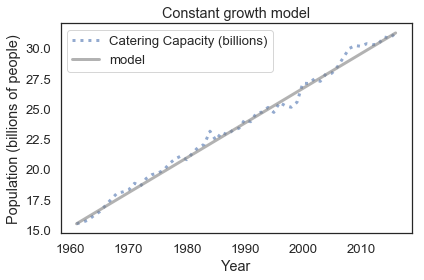

In [12]:
results = run_simulation(system)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'Constant growth model')

# Proportional Growth Model

In [13]:
def run_simulation2(system, update_func):
    """Run a model with proportional produce and waste.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [14]:
def update_func1(food, t, system):
    produce = system.produce * food
    waste = system.waste * food
    return food + produce - waste

In [15]:
system.produce = 0.0265
system.waste = 0.012

In [16]:
results = run_simulation2(system, update_func1)

,values
1961,15.483111
1962,15.707616
1963,15.935377
1964,16.166440
1965,16.400853
1966,16.638665
1967,16.879926
1968,17.124685
1969,17.372993
1970,17.624901


Saving figure to file figs/chap03-fig03.pdf


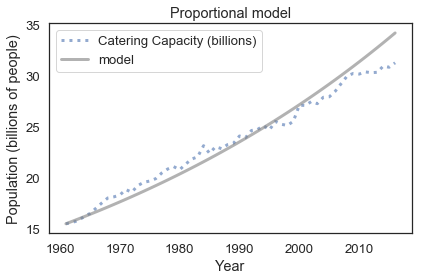

In [17]:
plot_results2(Catering_Capacity_in_billions_of_people, results, title = 'Proportional model')
savefig('figs/chap03-fig03.pdf')

In [18]:
def update_func2(food, t, system):
    """Compute the catering capacity next year.
    
    pop: current food availability
    t: current year
    system: system object containing parameters of the model
    
    returns: catering capacity next year
    """
    net_growth = system.alpha  * food
    return food + net_growth

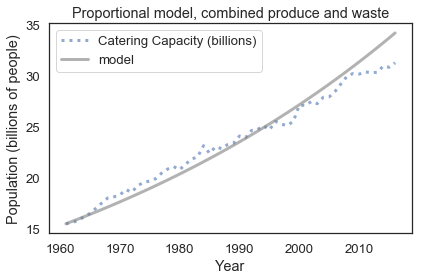

In [19]:
system.alpha = system.produce - system.waste
results = run_simulation2(system, update_func2)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'Proportional model, combined produce and waste')

In [20]:
waste_chance = linspace(0, 1 ,21)
waste_results = SweepSeries()

system.waste = waste_list[i]
plot(run_simulation2(system, update_func2))
        
sweep_waste(system, waste_chance)

NameError: name 'waste_list' is not defined

# Quadratic Growth Model

In [ ]:
def update_func_quad(food, t, system):
    """Compute the catering capacity next year with a quadratic model.
    
    food: current catering capacityn
    t: current year
    system: system object containing parameters of the model
    
    returns: capacity next year
    """
    net_growth = system.alpha * food + system.beta * food**2
    return food + net_growth

In [ ]:
t_0 = get_first_value(Year)
t_end = get_last_value(Year)
p_0 = Catering_Capacity_in_billions_of_people[0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.003,
                beta=-0.0005)

In [ ]:
results = run_simulation2(system, update_func_quad)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'Quadratic model')
savefig('figs/chap03-fig04.pdf')

In [ ]:
System.t_end = 2250
results = run_simulation2(system, update_func_quad)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'World Catering Capacity')
savefig('figs/chap04-fig01.pdf')

# Method 2:
(i) Expenditure on food incurred per year

In [ ]:
from pandas import read_csv
food_filename = read_csv("FAOSTAT_data_9-24-2018 (Meg).csv")
food_filename.columns = ['year', 'cost', 'people']
print(food_filename.head())
food_filename.cost = food_filename.cost/1000

In [ ]:
plot(food_filename.year, food_filename.cost)
decorate(title = "World Food Production over Time",
        xlabel = "Year",
        ylabel = "Value of food produced in 2004-2006 \n billion US Dollars")

In [ ]:
plot(food_filename.year, food_filename.people)
plot_results2(Catering_Capacity_in_billions_of_people, results, 'Proportional model, combined produce and waste')
decorate(title = "World Food Production over Time",
        xlabel = "Year",
        ylabel = "People capable of being fed in billions")